In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
from google.colab import files
Uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
# Import the necessary package
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('spam.csv')

In [4]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df.dtypes

,0
Category,object
Message,object


In [6]:
df['Category'] =df['Category'].map({'spam':1, 'ham':0})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.dtypes

,0
Category,int64
Message,object


In [8]:
df['Category'] =df['Category'].astype('int16')
df.dtypes

,0
Category,int16
Message,object


In [9]:
df.tail()

,Category,Message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [10]:
df['text_length'] = df['Message'].apply(len)
df['email_words'] = df['Message'].str.split().apply(len)
df.head()

,Category,Message,text_length,email_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [11]:
df.describe()

,Category,text_length,email_words
count,5572.000000,5572.000000,5572.000000
mean,0.134063,80.368988,15.584171
std,0.340751,59.926946,11.406598
min,0.000000,2.000000,1.000000
25%,0.000000,35.750000,7.000000
50%,0.000000,61.000000,12.000000
75%,0.000000,122.000000,23.000000
max,1.000000,910.000000,171.000000


In [12]:
df['text_length'] = df['text_length'].astype('int16')
df['email_words'] = df['email_words'].astype('int16')
df.dtypes

,0
Category,int16
Message,object
text_length,int16
email_words,int16


In [13]:
# Check the memory usage after conversions
df.memory_usage(deep=True)


,0
Index,128
Category,11144
Message,836938
text_length,11144
email_words,11144


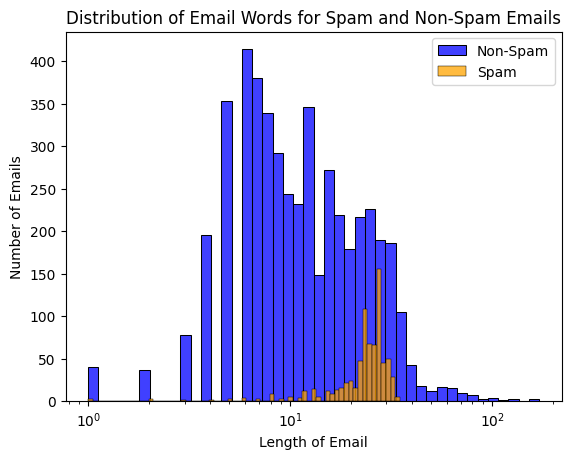

In [14]:
sns.histplot(df[df['Category'] ==0]['email_words'], color='blue', label='Non-Spam', kde=False, log_scale = True)
sns.histplot(df[df['Category'] ==1]['email_words'], color='orange', label='Spam', kde=False, log_scale = True)

plt.xlabel('Length of Email')
plt.ylabel('Number of Emails')
plt.title('Distribution of Email Words for Spam and Non-Spam Emails')
plt.legend()

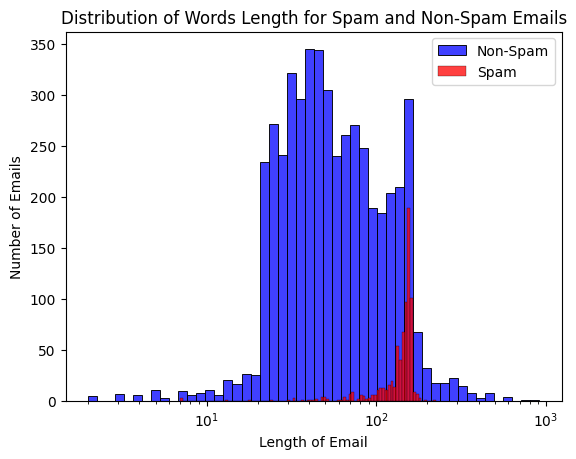

In [15]:
sns.histplot(df[df['Category'] == 0]['text_length'],color = 'blue', label = 'Non-Spam', kde = False, log_scale=True)
sns.histplot(df[df['Category'] == 1]['text_length'],color = 'red', label = 'Spam', kde = False, log_scale=True)

plt.xlabel('Length of Email')
plt.ylabel('Number of Emails')
plt.title('Distribution of Words Length for Spam and Non-Spam Emails')
plt.legend()

In [16]:
from wordcloud import WordCloud

all_words_spam = ' '.join(list(df[df['Category'] == 0]['Message']))
all_words_not_spam = ' '.join(list(df[df['Category'] == 1]['Message']))
wordcloud_not_spam = WordCloud(width = 800, height = 800, background_color ='white').generate(all_words_spam)
wordcloud_spam = WordCloud(width = 800, height = 800, background_color ='white').generate(all_words_not_spam)

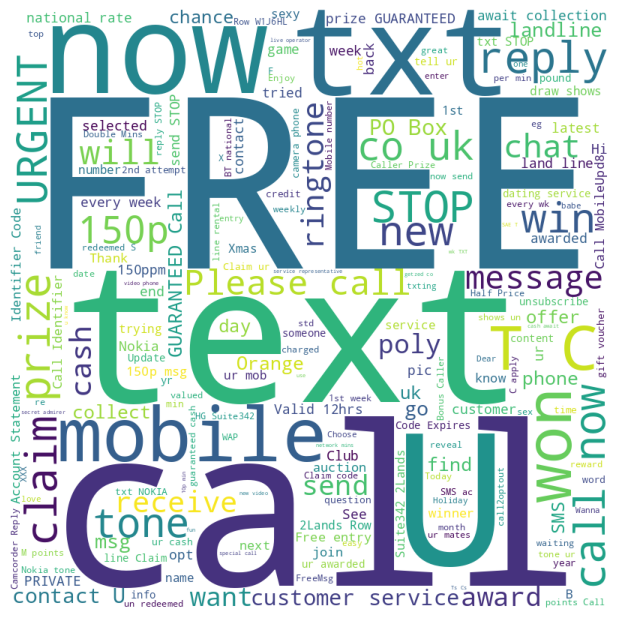

In [17]:
# Display the Spam wordcloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud_spam)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

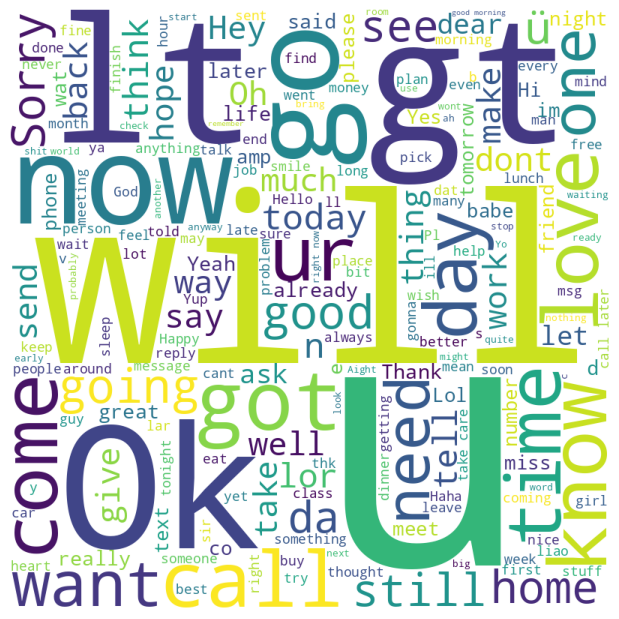

In [18]:
# Display the Not Spam wordcloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud_not_spam)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [19]:
#Import and download some of the corpus that important for the next process
import nltk
nltk.download('punkt')  # For tokenization
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # Optional: Open Multilingual WordNet (for additional language support)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:

from nltk.tokenize import word_tokenize

# Stemming and Lemmatization processing.
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_text(text):

    word_tokens = word_tokenize(text)
    stemmed_text = ' '.join([stemmer.stem(word) for word in word_tokens])
    return stemmed_text

def lemmatize_text(text):

    word_tokens = word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokens])
    return lemmatized_text


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Category', axis = 1), df['Category'], test_size = 0.20, stratify = df['Category'], random_state = 42)

In [22]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.6/565.6 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [45]:
import mlflow


EXPERIMENT_NAME= 'Spam-Classifier'
mlflow.set_experiment(EXPERIMENT_NAME)
#EXP_ID = mlflow.create_experiment(EXPERIMENT_NAME)

MlflowException: API request to http://127.0.0.1:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=Spam-Classifier (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7d01e6c67010>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [24]:
#!mlflow ui

In [28]:
# Fetch the experiment details as a dictionary
current_experiment = dict(mlflow.get_experiment_by_name(EXPERIMENT_NAME))

# Extract the experiment ID from the dictionary
experiment_id = current_experiment['experiment_id']

# Print the experiment ID
print(f"Experiment ID: {experiment_id}")

Experiment ID: 566868070186796690


In [26]:
import mlflow.data
from mlflow.data.pandas_dataset import PandasDataset
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import mlflow
import pandas as pd
import numpy as np

def evaluate_model(train_data, train_labels, experiment_id):

    # Define models to evaluate
    models = {
        "MultinomialNB": MultinomialNB(),
        "LogisticRegression": LogisticRegression(),
        "RandomForestClassifier": RandomForestClassifier(),
        "XGBClassifier": XGBClassifier(),
    }

    # Define vectorizers
    vectorizers = {
        "CountVectorizer": CountVectorizer(),
        "TfidfVectorizer": TfidfVectorizer(),
    }

    results = []

    # Iterate over vectorizers
    for vectorizer_name, vectorizer in vectorizers.items():
        train_data_vectorized = vectorizer.fit_transform(train_data)

        # Iterate over models
        for model_name, model in models.items():
            vect_model_name = model_name + "_" + vectorizer_name

            # End any existing MLflow run before starting a new one
            mlflow.end_run()

            # Start a new MLflow run
            with mlflow.start_run(experiment_id=experiment_id, run_name=vect_model_name) as run:

                # Perform cross-validation
                cv_results = cross_validate(
                    model,
                    train_data_vectorized,
                    train_labels,
                    scoring=['accuracy', 'precision', 'recall', 'f1'],
                    cv=3,
                    return_train_score=False
                )

                # Iterate over each fold's result and log metrics
                for i in range(3):
                    iteration_result = {
                        'Iteration': i + 1,
                        'Model': model_name,
                        'Vectorizer': vectorizer_name,
                        'Accuracy': cv_results['test_accuracy'][i],
                        'Precision': cv_results['test_precision'][i],
                        'Recall': cv_results['test_recall'][i],
                        'F1 Score': cv_results['test_f1'][i],
                    }
                    results.append(iteration_result)

                # Calculate the mean metrics across the folds
                mean_result = {
                    'Iteration': 'Mean',
                    'Model': model_name,
                    'Vectorizer': vectorizer_name,
                    'Accuracy': np.mean(cv_results['test_accuracy']),
                    'Precision': np.mean(cv_results['test_precision']),
                    'Recall': np.mean(cv_results['test_recall']),
                    'F1 Score': np.mean(cv_results['test_f1'])
                }
                results.append(mean_result)

                # Log metrics to MLflow
                mlflow.log_metric(f"cv_3_{vect_model_name}_accuracy", mean_result['Accuracy'])
                mlflow.log_metric(f"cv_3_{vect_model_name}_precision", mean_result['Precision'])
                mlflow.log_metric(f"cv_3_{vect_model_name}_recall", mean_result['Recall'])
                mlflow.log_metric(f"cv_3_{vect_model_name}_f1", mean_result['F1 Score'])

                # Fit the model on the entire dataset
                model.fit(train_data_vectorized, train_labels)

                # Log the model's predictions as part of the training dataset
                training_df = pd.concat([pd.Series(train_data), pd.Series(train_labels)], axis=1).reset_index(drop=True)
                training_df["ModelOutput"] = model.predict(train_data_vectorized)

                # Log dataset to MLflow
                dataset = mlflow.data.from_pandas(
                    training_df,
                    targets="Category",
                    predictions="ModelOutput",
                    name=f"data_{vect_model_name}"
                )
                mlflow.log_input(dataset, context="training")

                # Log model in MLflow
                if model_name == "XGBoost":
                    mlflow.xgboost.log_model(model, "model")
                else:
                    mlflow.sklearn.log_model(model, "model")

            # End the MLflow run
            mlflow.end_run()

    return pd.DataFrame(results)


In [43]:
email_res = evaluate_model(x_train['Message'], y_train, experiment_id)

2024/10/13 17:52:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 17:52:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 17:52:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 17:52:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 17:53:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 17:53:13 

In [47]:
def viz_result_metric(data):
    plt.figure(figsize=(15, 8))

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        sns.lineplot(data=data, x='Iteration', y=metric, hue='Model', style='Vectorizer', markers=True)
        plt.title(f'Model Performance: {metric}')
        plt.xlabel('Iteration')
        plt.ylabel(metric)
        plt.legend(title='Models / Vectorizer', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

In [46]:
email_res

,Iteration,Model,Vectorizer,Accuracy,Precision,Recall,F1 Score
0,1,MultinomialNB,CountVectorizer,0.977793,0.895238,0.944724,0.919315
1,2,MultinomialNB,CountVectorizer,0.983849,0.940000,0.940000,0.940000
2,3,MultinomialNB,CountVectorizer,0.976431,0.918367,0.904523,0.911392
3,Mean,MultinomialNB,CountVectorizer,0.979358,0.917868,0.929749,0.923569
4,1,LogisticRegression,CountVectorizer,0.975774,0.960452,0.854271,0.904255
5,2,LogisticRegression,CountVectorizer,0.981830,0.988701,0.875000,0.928382
6,3,LogisticRegression,CountVectorizer,0.977104,0.976879,0.849246,0.908602
7,Mean,LogisticRegression,CountVectorizer,0.978236,0.975344,0.859506,0.913746
8,1,RandomForestClassifier,CountVectorizer,0.973082,1.000000,0.798995,0.888268
9,2,RandomForestClassifier,CountVectorizer,0.973082,0.987805,0.810000,0.890110


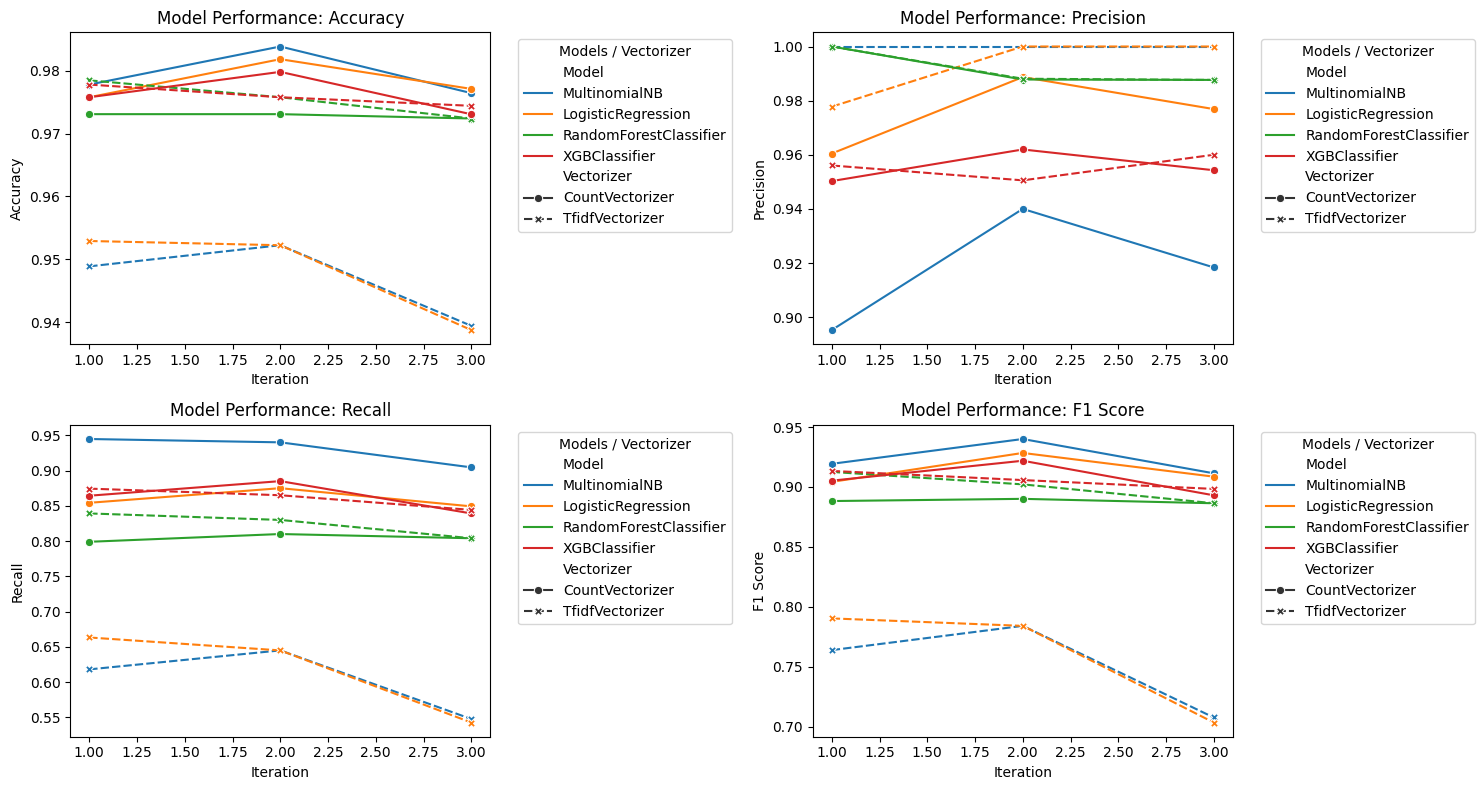

In [48]:
# Visualize the data iteration but exclude the metrics Mean
viz_result_metric( email_res[email_res['Iteration'] != 'Mean'])

In [49]:
def viz_result_metric_mean(data):
    mean_data = data[data['Iteration'] == 'Mean'].pivot(index='Vectorizer', columns='Model', values=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

    plt.figure(figsize=(16, 10))

    metrics = mean_data.columns.levels[0]
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        sns.heatmap(mean_data[metric], annot=True, fmt=".3f", linewidths=.5, cmap='coolwarm')
        plt.title(metric)
        plt.ylabel('Vectorizer')
        plt.xlabel('Model')

    plt.tight_layout()
    plt.show()

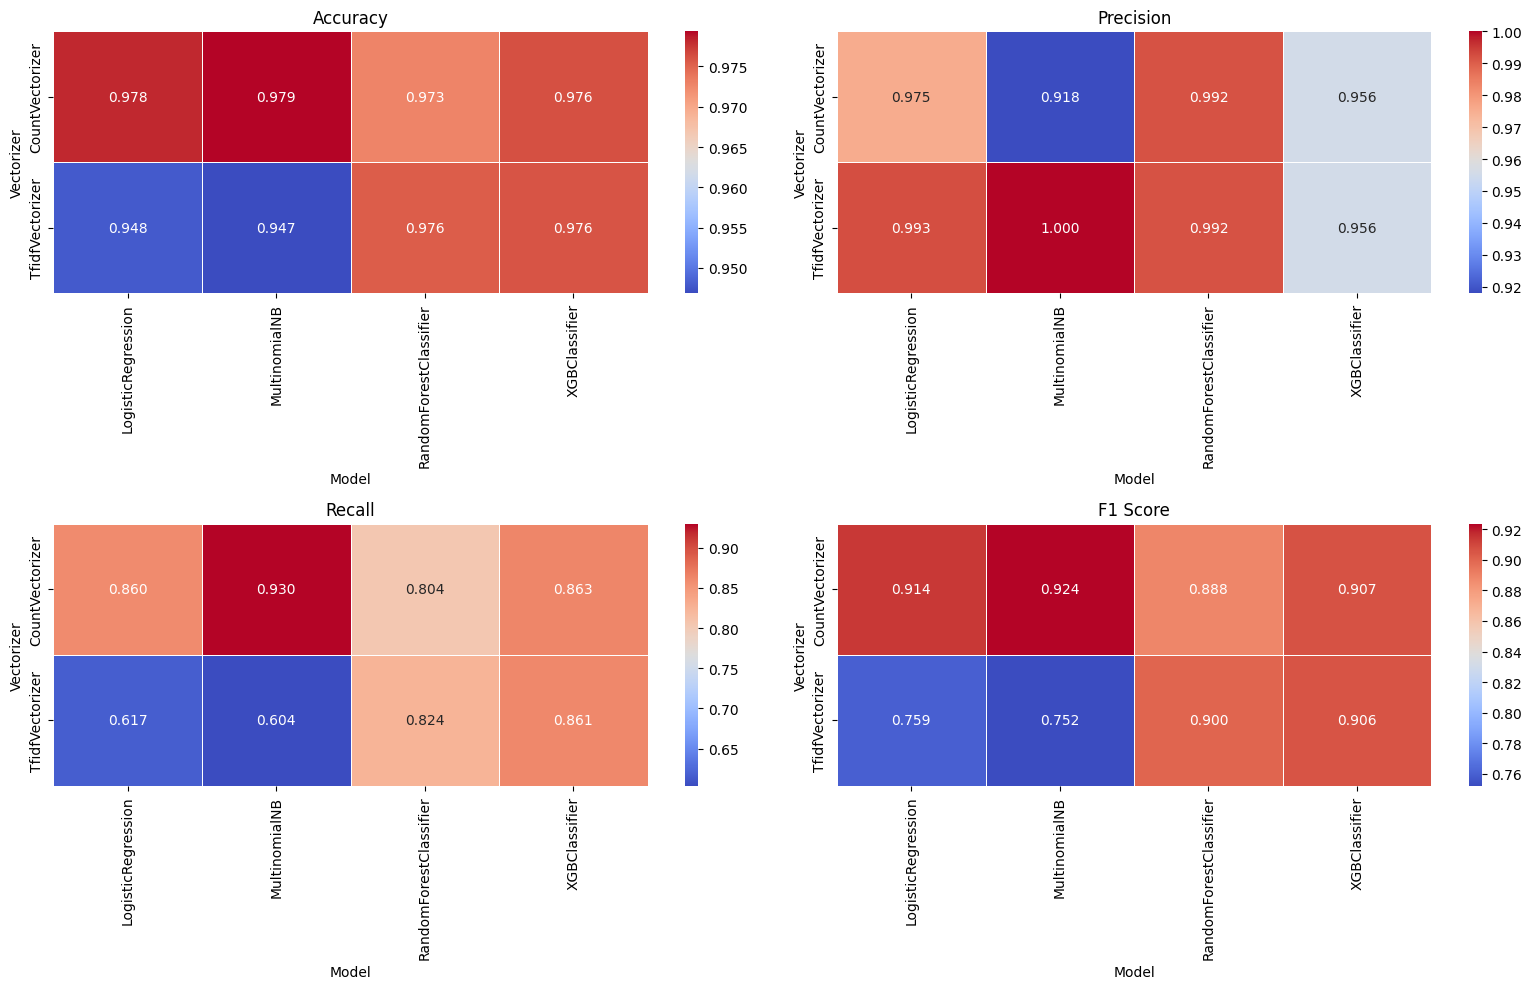

In [50]:
viz_result_metric_mean(email_res)

In [53]:
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer()
naive_bayes_classifier = MultinomialNB()

# Creating a pipeline for the whole process
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', naive_bayes_classifier)
])

pipeline.fit(x_train['Message'], y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [55]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(x_test['Message'])
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

